<a href="https://colab.research.google.com/github/Jayasurya227/AI-in-Healthcare-Building-a-Life-Saving-Heart-Disease-Predictor/blob/main/AI_in_Healthcare_Building_a_Life_Saving_Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1:Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

#set plot style
sns.set_style("whitegrid")

**Step 2: Load the Dataset**

In [ ]:
#Download the Dataset using kaggle Hub API
print("Downloading Dataset........")
path=kagglehub.dataset_download("redwankarimsony/heart-disease-data")

#Load the dataset from the downloaded path
file_path=f'{path}/heart.csv'
df=pd.read_csv("/content/archive (5).zip")

print("Dataset downloaded and loaded successfully.")
print(f"Dataset shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Dataset shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Step:2 Explotary Data Analysis(EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


**2.1 Analyze the Target Variable**

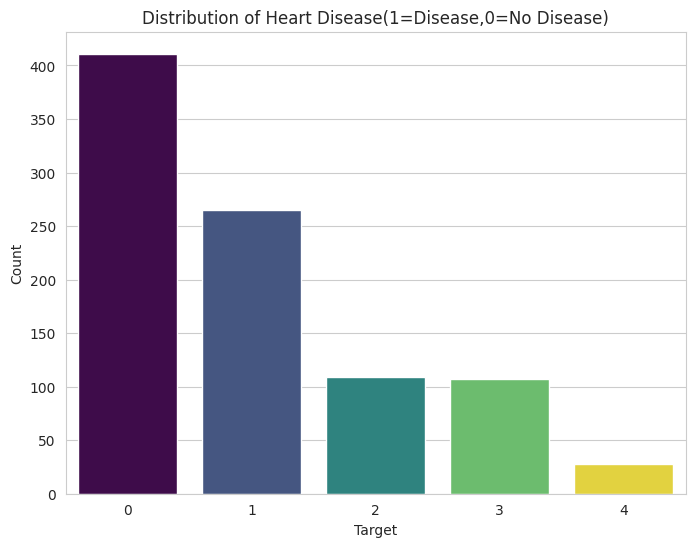

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title("Distribution of Heart Disease(1=Disease,0=No Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

**2.2 Analyzing Features VS Target**

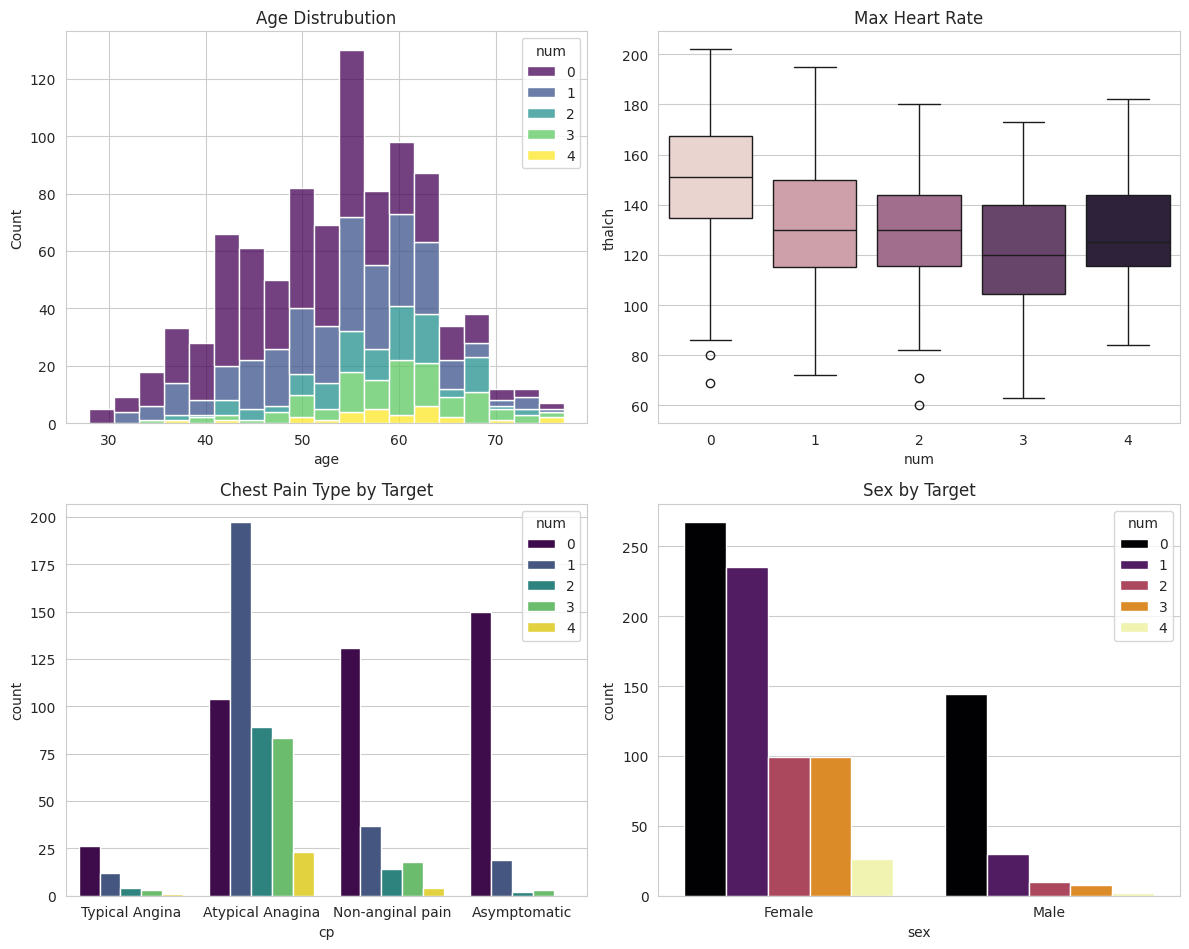

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

#Age vs.Target
sns.histplot(ax=axes[0,0],data=df,x='age',hue='num',multiple='stack',palette='viridis').set_title('Age Distrubution')

#Max Heart Rate vs.Target
sns.boxplot(ax=axes[0,1],data=df,x='num',y='thalch',hue='num',legend=False).set_title('Max Heart Rate')

#Chest Pain Type vs. Target
cp_plot=sns.countplot(ax=axes[1,0],data=df,x='cp',hue='num',palette='viridis')
cp_plot.set_title("Chest Pain Type by Target")
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina','Atypical Anagina','Non-anginal pain','Asymptomatic'])

#Sex vs .Target
sex_plot=sns.countplot(ax=axes[1,1],data=df,x='sex',hue='num',palette='inferno')
sex_plot.set_title("Sex by Target")
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female','Male'])

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

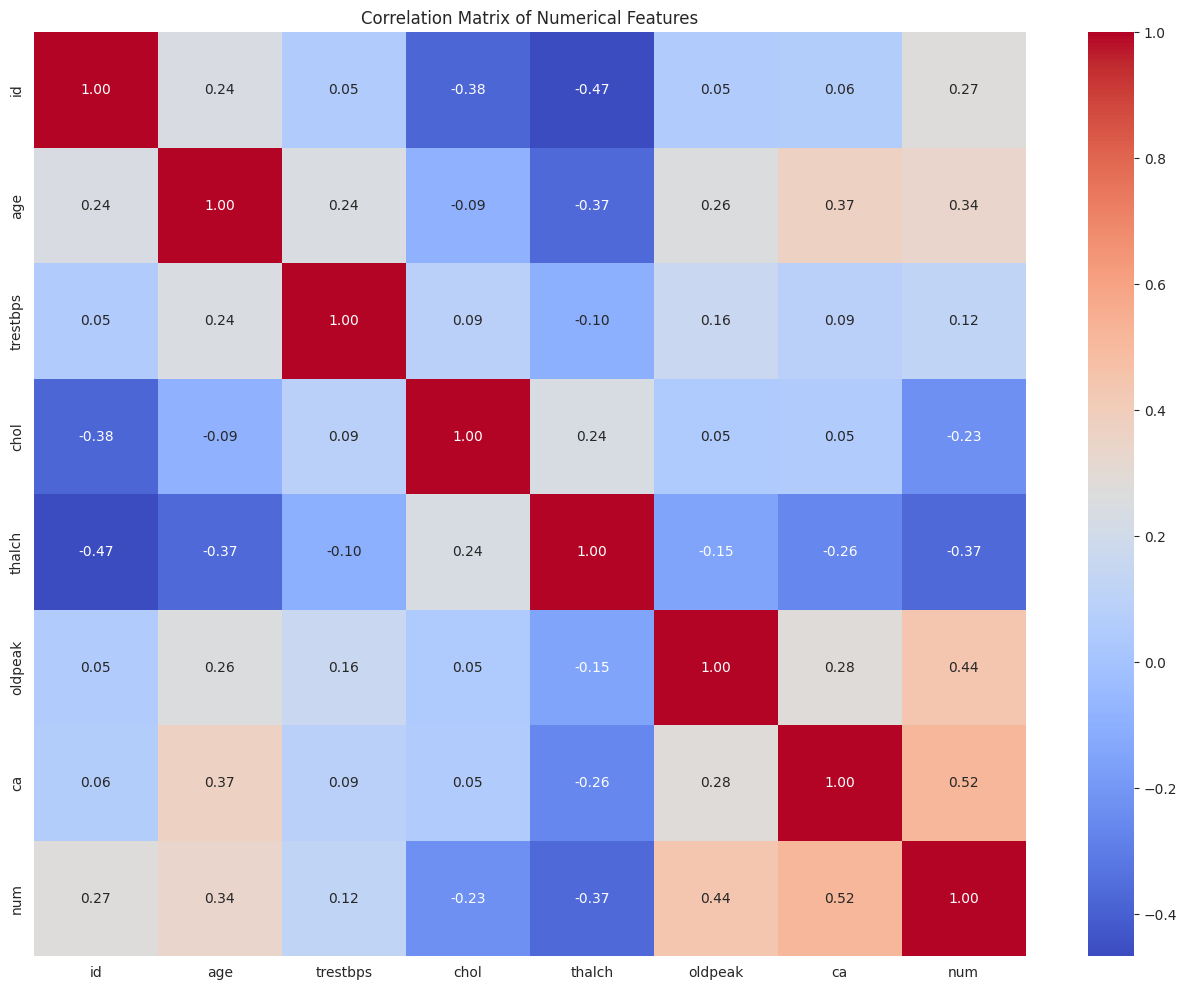

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(16,12))
#Select only Numerical columns for calculation
numerical_df=df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Step 3:Data Preprocessing**

In [ ]:
from sklearn.impute import SimpleImputer
x=df.drop('num',axis=1)
y=df['num']

In [ ]:
from sklearn.impute import SimpleImputer
x=df.drop('num',axis=1)
y=df['num']

In [ ]:
x.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect


In [ ]:
y.head(3)

,num
0,0
1,2
2,1


In [ ]:
x = df.drop('num', axis=1)
x = x.drop(['id', 'dataset'], axis=1)
x.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect


In [ ]:
#Identify categorical and numericql features
categorical_features=['sex','cp','fbs','restecg','exang','slope','thal']
numeric_features=['age','trestbps','chol','thalch','oldpeak','ca']

In [ ]:
#Create Preprocessing pipeline for numerical And Categorical features

numerical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

In [ ]:
# Create a column transformer to apply diffrent transformation to diffrent columns

preprocessor=ColumnTransformer(transformers=[
    ('num',numerical_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)
])

#split data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

#Fit and transform the training data
X_train_processed=preprocessor.fit_transform(X_train)

**Step 4: Model Building & Training **




we will build models and wrap them in a scikit-learn Pipeline. Tha pipeline will automatically apply our preprocessing steps ti the data before trainig the model


**4.1 Model 1: Logistic Regression (Baseline)**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Corrected typo here
from sklearn.linear_model import LogisticRegression

#identify categorical and numerical features directly from x_train columns
all_feature_names=X_train.columns
categorical_features=[col for col in all_feature_names if X_train[col].dtype=='object'] # Corrected variable name
numeric_features=[col for col in all_feature_names if X_train[col].dtype!='object'] # Corrected logic here
#Create preprocessing pipeline for numerical and categorical features
numerical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])
categorical_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

preprocessor=ColumnTransformer(transformers=[
    ('num',numerical_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)
])

#Create a Logistic Regression Pipeline
logreg_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression(random_state=42))
])

#Train the model
logreg_pipeline.fit(X_train,y_train)
y_pred_logreg=logreg_pipeline.predict(X_test)

**4.2 Model 2: Rnadom Forest Classifier(Advanced)**

In [ ]:
logreg_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression(random_state=42))
])
logreg_pipeline.fit(X_train,y_train)
y_pred_logreg=logreg_pipeline.predict(X_test)

**4.3 Model 3: Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC

#create the SVM  pipeline
svm_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',SVC(random_state=42))
])
svm_pipeline.fit(X_train,y_train)
y_pred_svm=svm_pipeline.predict(X_test)

**4.4 Model 4: K-Nearat Neighbours(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#create the KNN Pieline
knn_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',KNeighborsClassifier())
])
knn_pipeline.fit(X_train,y_train)
y_pred_knn=knn_pipeline.predict(X_test)

**Step 5: Model Eveluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

In [ ]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test,y_pred_logreg,zero_division=0))

print("\n--- Random Forest Classifier Performance ---")
print(classification_report(y_test,y_pred_rf,zero_division=0))

print("\n--- Support Vector Machine Performance ---")
print(classification_report(y_test,y_pred_svm,zero_division=0))

print("\n--- K-Nearest Neighbors Performance ---")
print(classification_report(y_test,y_pred_knn,zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.49      0.57      0.53        53
           2       0.30      0.14      0.19        22
           3       0.16      0.19      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.55      0.58      0.56       184


--- Random Forest Classifier Performance ---
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        82
           1       0.50      0.53      0.51        53
           2       0.23      0.14      0.17        22
           3       0.14      0.14      0.14        21
           4       0.00      0.00      0.00         6

    accuracy                           0.56       184
   macro avg       0.32      0.33      0.32  

**Visualize the Confuse Matrix for the best model(SVM)**

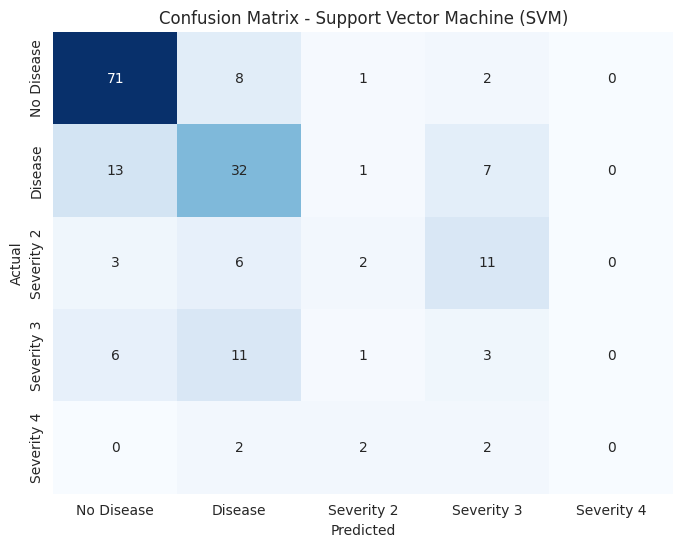

In [ ]:
#Visualize the Confuse Matrix for the best model(SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False, # Added the missing comma here
            xticklabels=['No Disease','Disease','Severity 2','Severity 3','Severity 4'],yticklabels=['No Disease','Disease','Severity 2','Severity 3','Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

**Step 6:Feature Importance**

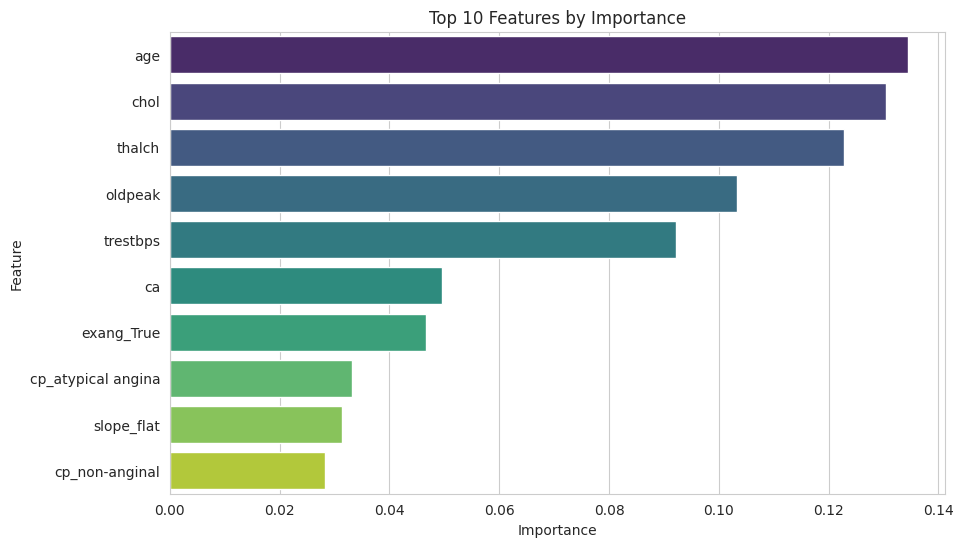

In [ ]:
#Extract features names after one-hot encoding
feature_names = rf_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
numeric_feature_names = numeric_features
all_feature_names = list(numeric_feature_names) + list(feature_names)

#Get feature importances from the trained model
importances=rf_pipeline.named_steps['classifier'].feature_importances_

#create a DataFreame for Visualization
feature_importance_df=pd.DataFrame({'Feature':all_feature_names,'Importance':importances})

#Sort the DataFrame by importance in descending order
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False).head(10)

#Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df,palette='viridis',hue='Feature',legend=False)
plt.title('Top 10 Features by Importance')
plt.show()